## DBSCAN - Digits Exercise

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import DBSCAN

from scipy.spatial.distance import pdist

For this exercise, you'll be working with the digits dataset from sklearn. These are 8x8 handwritten digits. 

In [2]:
digits = load_digits(as_frame = True)

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

We can make use of matplotlib to visualize each image. Try changing the value of `i` below to view different examples.

Label: 8


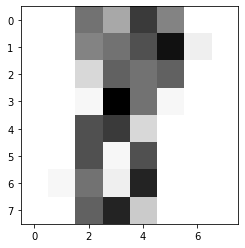

In [3]:
i = 18

print(f'Label: {digits["target"][i]}')
plt.imshow(digits['images'][i], cmap = 'Greys');

**Question 1:** What is the dimensionality of this dataset? That is, how many variables do we have?

In this notebook, we'll take a simple approach to measure similarity of images - the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance), which is the normal distance formula from high school algebra but extended to more than 2 dimensions.

Let's start by getting an idea about the typical distance between observations.

Currently, the values are between 0 and 255. Let's rescale so that the observations are between 0 and 1 using a MinMaxScaler and then compute distances using the `pdist` function from scipy.

In [4]:
distances = pdist(MinMaxScaler().fit_transform(digits['data']))

If we want to look at the distribution, it might help to convert to a pandas Series.

In [5]:
distances = pd.Series(distances)

**Question 2:** Look at the distribution of distances. What do you notice?

In [6]:
distances.describe()

count    1.613706e+06
mean     3.046336e+00
std      5.153044e-01
min      3.307189e-01
25%      2.759489e+00
50%      3.091501e+00
75%      3.396751e+00
max      4.866015e+00
dtype: float64

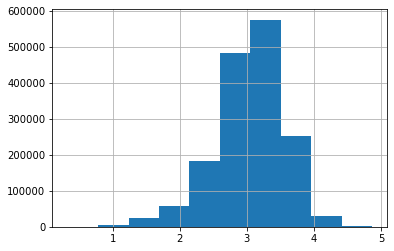

In [7]:
pd.Series(distances).hist();

Now, let's apply the DBSCAN algorithm to our dataset.

It might be helpful to refer to the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Let's start with the default value for `eps`, 0.5.

In [8]:
pipe = Pipeline(
    steps = [
        ('scale', MinMaxScaler()),
        ('cluster', DBSCAN(eps = 0.5))
    ]
)

pipe.fit(digits['data'])

Pipeline(steps=[('scale', MinMaxScaler()), ('cluster', DBSCAN())])

After running the algorithm, we can look at the distribution of labels.

**Question 3:** What do you notice about the labels for this setting of eps? Why does this happen?

In [9]:
pd.Series(pipe['cluster'].labels_).value_counts()

-1    1797
dtype: int64

Now, let's adjust the value of eps up.

In [10]:
pipe = Pipeline(
    steps = [
        ('scale', MinMaxScaler()),
        ('cluster', DBSCAN(eps = 1))
    ]
)

pipe.fit(digits['data'])

pd.Series(pipe['cluster'].labels_).value_counts()

-1     1429
 0       94
 3       56
 5       50
 2       30
 13      14
 6       11
 22      10
 1        8
 12       8
 20       7
 18       6
 19       6
 24       6
 14       6
 23       5
 17       5
 16       5
 11       5
 25       5
 9        5
 8        5
 7        5
 4        5
 21       5
 10       3
 15       3
dtype: int64

Let's look at the images for some of the smaller clusters to see if the result looks plausible.

In [11]:
digits['data'][(pipe['cluster'].labels_ == # Put in the cluster number of one of the smaller clusters here
               )].index.to_list()

SyntaxError: invalid syntax (2755001909.py, line 2)

In [12]:
digits['data'][(pipe['cluster'].labels_ == 15
               )].index.to_list()

[338, 989, 1183]

Label: 6


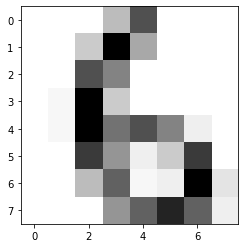

In [15]:
i = 1183

print(f'Label: {digits["target"][i]}')
plt.imshow(digits['images'][i], cmap = 'Greys');

Now, vary the value of eps and watch how the different digits get clustered together. 

**Question 4:** What do you notice as you vary the value of eps? Do digits tend to be correctly clustered together? 

In [ ]:
pipe = Pipeline(
    steps = [
        ('scale', MinMaxScaler()),
        ('cluster', DBSCAN(eps = # Adjust this and observe who the target/cluster distribution changes
                          ))
    ]
)

pipe.fit(digits['data'])

pd.DataFrame({
    'target': digits['target'],
    'cluster': pipe['cluster'].labels_
}).groupby(['cluster'])['target'].value_counts()

In [16]:
pipe = Pipeline(
    steps = [
        ('scale', MinMaxScaler()),
        ('cluster', DBSCAN(eps = 1.25
                          ))
    ]
)

pipe.fit(digits['data'])

pd.DataFrame({
    'target': digits['target'],
    'cluster': pipe['cluster'].labels_
}).groupby(['cluster'])['target'].value_counts()

cluster  target
-1       8         116
         5          85
         9          78
         3          53
         2          49
         7          48
         4          43
         1          18
         6          11
         0          10
 0       0         168
 1       1          86
         8          22
         6           1
 2       3         122
 3       6         169
         5           1
 4       1          52
 5       4         138
 6       2         114
 7       5          47
 8       7         121
 9       5          32
 10      9          85
 11      8          17
 12      9          12
 13      2           5
 14      7          10
 15      5           7
 16      9           5
 17      1          26
 18      8           7
 19      3           8
 20      2           5
 21      8           7
 22      5           5
 23      8           5
 24      5           5
 25      2           4
Name: target, dtype: int64

You can use the following cell to identify the index of anything that looks odd.

In [20]:
pd.DataFrame({
    'target': digits['target'],
    'cluster': pipe['cluster'].labels_
}).query('cluster == 1 and target == 1')

,target,cluster
1,1,1
93,1,1
99,1,1
257,1,1
277,1,1
...,...,...
1752,1,1
1757,1,1
1760,1,1
1766,1,1


Label: 1


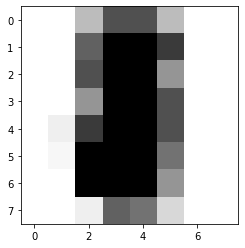

In [21]:
i = 1774

print(f'Label: {digits["target"][i]}')
plt.imshow(digits['images'][i], cmap = 'Greys');

Finally, adjust the value of eps until you have only a small number of outliers.

In [186]:
pipe = Pipeline(
    steps = [
        ('scale', MinMaxScaler()),
        ('cluster', DBSCAN(eps = # Adjust this until you have only a small number of outlier points 
                          ))
    ]
)

pipe.fit(digits['data'])

pd.Series(pipe['cluster'].labels_).value_counts()

SyntaxError: invalid syntax (1877545734.py, line 5)

In [231]:
pipe = Pipeline(
    steps = [
        ('scale', MinMaxScaler()),
        ('cluster', DBSCAN(eps = 2
                          ))
    ]
)

pipe.fit(digits['data'])

pd.Series(pipe['cluster'].labels_).value_counts()

 0    1793
-1       4
dtype: int64

In [232]:
digits['data'][(pipe['cluster'].labels_ == -1
               )].index.to_list()

[502, 988, 1149, 1264]

Label: 8


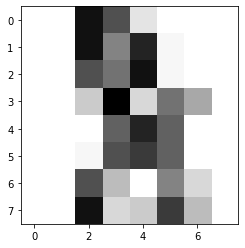

In [234]:
i = 1149

print(f'Label: {digits["target"][i]}')
plt.imshow(digits['images'][i], cmap = 'Greys');

**Question 5:** What might be some downsides to using the Euclidean distance on this dataset?